In [55]:
import warnings
warnings.filterwarnings("ignore")

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from typing import Tuple
from scipy.stats import pearsonr

In [57]:
def rank_biserial_correlation(x: pd.Series, y: pd.Series) -> Tuple[float, str]:
    """
    Compute rank-biserial correlation from two independent samples.
    """

    nx = len(x)
    ny = len(y)

    U, _ = mannwhitneyu(x, y, alternative='two-sided')
    rbc = 1 - (2 * U) / (nx * ny)

    abs_rbc = abs(rbc)
    if abs_rbc < 0.1:
        interpretation = "negligible"
    elif abs_rbc < 0.3:
        interpretation = "small"
    elif abs_rbc < 0.5:
        interpretation = "medium"
    else:
        interpretation = "large"

    return rbc, interpretation

In [58]:
def cliffs_delta(x: pd.Series, y: pd.Series) -> Tuple[float, str]:
    """
    Compute Cliff's Delta and return interpretation.
    """
    nx = len(x)
    ny = len(y)
    greater = sum(xi > yj for xi in x for yj in y)
    less = sum(xi < yj for xi in x for yj in y)
    delta = (greater - less) / (nx * ny)

    abs_delta = abs(delta)
    if abs_delta < 0.147:
        interpretation = "negligible"
    elif abs_delta < 0.33:
        interpretation = "small"
    elif abs_delta < 0.474:
        interpretation = "medium"
    else:
        interpretation = "large"
    return delta, interpretation

In [59]:
def classify_cortisol_level(value):
    if value > 20:
        return "High"
    elif value < 10:
        return "Low"
    else:
        return "Moderate"

In [60]:
df_data_iga = pd.read_csv("../processed_data/3_processed_data_iga_analyzed.csv")
print(df_data_iga.shape)
df_data_iga.head(5)

(27, 11)


,ID,Attachment,Gender,Average IgA Morning,Average IgA Afternoon,Average Difference IgA,Group,Variability_Profile,IgA_Level_Profile_Morning,IgA_Level_Profile_Afternoon,IgA-Change
0,1,Insecure,Male,21.765240,28.368055,6.602815,Insecure - Male,Low/Moderate,Low IgA,Low IgA,No Change
1,4,Secure,Male,28.473065,50.881961,22.408896,Secure - Male,Low/Moderate,Low IgA,Moderate IgA,Increase
2,5,Secure,Female,100.215520,49.798129,-50.417391,Secure - Female,Low/Moderate,High IgA,Moderate IgA,Decrease
3,7,Insecure,Female,24.173487,41.577934,17.404447,Insecure - Female,Low/Moderate,Low IgA,Moderate IgA,Increase
4,12,Secure,Female,29.554870,45.078186,15.523316,Secure - Female,Low/Moderate,Low IgA,Moderate IgA,Increase


In [61]:
df_data_cortisol = pd.read_csv("../processed_data/2_processed_data_cortisol.csv")
print(df_data_cortisol.shape)
df_data_cortisol.head(5)

(10, 11)


,Sample,Cortisol (pg/mL),Attachment,Gender,IgA D1-Morning,IgA D1-Afternoon,IgA D2-Morning,IgA D2-Afternoon,Average IgA Morning,Average IgA Afternoon,Average Difference IgA
0,38,4.21,Secure,NaN,58.086780,51.030042,38.632819,36.767491,48.359800,43.898767,-4.461033
1,16,3.59,Secure,Female,79.173752,108.512940,35.780159,39.270931,57.476955,73.891936,16.414980
2,32,22.75,Secure,Male,21.135748,58.108226,43.994904,31.113912,32.565326,44.611069,12.045743
3,1,5.62,Insecure,Male,20.076728,31.719207,23.453752,25.016903,21.765240,28.368055,6.602815
4,7,1.83,Insecure,Female,26.747838,47.213491,21.599136,35.942378,24.173487,41.577934,17.404447


In [62]:
df_merge = df_data_iga.merge(right=df_data_cortisol, left_on="ID", right_on="Sample")
df_merge.shape

(8, 22)

In [63]:
df_merge.columns

Index(['ID', 'Attachment_x', 'Gender_x', 'Average IgA Morning_x',
       'Average IgA Afternoon_x', 'Average Difference IgA_x', 'Group',
       'Variability_Profile', 'IgA_Level_Profile_Morning',
       'IgA_Level_Profile_Afternoon', 'IgA-Change', 'Sample',
       'Cortisol (pg/mL)', 'Attachment_y', 'Gender_y', 'IgA D1-Morning',
       'IgA D1-Afternoon', 'IgA D2-Morning', 'IgA D2-Afternoon',
       'Average IgA Morning_y', 'Average IgA Afternoon_y',
       'Average Difference IgA_y'],
      dtype='object')

In [64]:
df_merge = df_merge[['ID', 'Attachment_x', 'Gender_x', 'Average IgA Morning_x',
       'Average IgA Afternoon_x', 'Average Difference IgA_x', 'Group',
       'Variability_Profile', 'IgA_Level_Profile_Morning',
       'IgA_Level_Profile_Afternoon', 'IgA-Change', 'Cortisol (pg/mL)']]
df_merge.columns = ['ID', 'Attachment', 'Gender', 'Average IgA Morning',
       'Average IgA Afternoon', 'Average Difference IgA', 'Group',
       'Variability_Profile', 'IgA_Level_Profile_Morning',
       'IgA_Level_Profile_Afternoon', 'IgA-Change', 'Cortisol (pg/mL)']

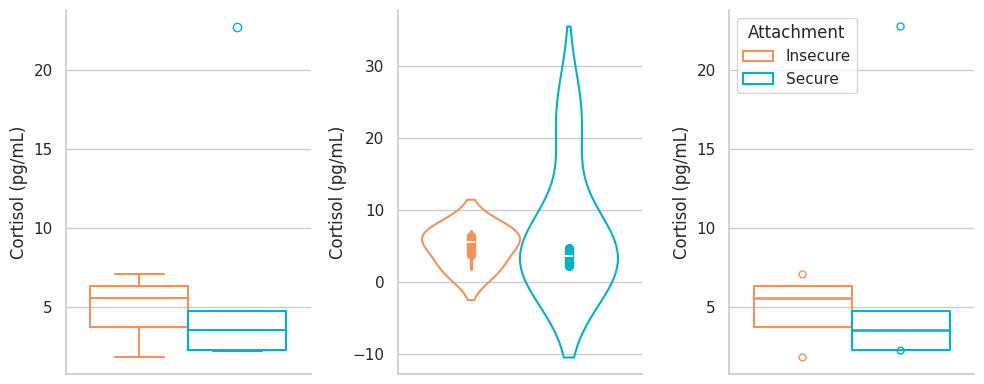

In [65]:
sns.set(style="whitegrid", font_scale=1)

palette = {"Secure": "#00B2CA", "Insecure": "#F79256"}

f, axes = plt.subplots(1, 3, figsize=(10, 4), sharex=True)

sns.boxplot(
    data=df_merge, 
    y="Cortisol (pg/mL)", 
    hue="Attachment", 
    ax=axes[0], 
    fill=False,
    palette=palette, 
    legend=False)

sns.violinplot(
    data=df_merge, 
    y="Cortisol (pg/mL)", 
    hue="Attachment", 
    ax=axes[1], 
    fill=False, 
    palette=palette,
    legend=False)

sns.boxenplot(
    data=df_merge, 
    y="Cortisol (pg/mL)", 
    hue="Attachment", 
    ax=axes[2], 
    palette=palette,
    fill=False)

sns.despine()
plt.tight_layout()

In [66]:
variables = ["Cortisol (pg/mL)"]

attachment_comparison = []
for var in variables:
    secure_vals = df_merge[df_merge["Attachment"] == "Secure"][var]
    insecure_vals = df_merge[df_merge["Attachment"] == "Insecure"][var]
    stat, p = mannwhitneyu(secure_vals, insecure_vals, alternative='two-sided')
    statistic_result = {"variable": var, "U statistic": stat, "p-value": p}
    attachment_comparison.append(statistic_result)

attachment_comparison = pd.DataFrame(attachment_comparison)
attachment_comparison["reject"] = attachment_comparison["p-value"]<=0.05
attachment_comparison

,variable,U statistic,p-value,reject
0,Cortisol (pg/mL),7.0,1.0,False


In [67]:
attachment_cliffs = []
for var in variables:
    secure_vals = df_merge[df_merge["Attachment"] == "Secure"][var]
    insecure_vals = df_merge[df_merge["Attachment"] == "Insecure"][var]
    delta, interp = cliffs_delta(secure_vals, insecure_vals)
    attachment_cliffs.append({"variable": var, "Cliff's Delta": delta, "Interpretation": interp})

attachment_cliffs = pd.DataFrame(attachment_cliffs)
attachment_cliffs

,variable,Cliff's Delta,Interpretation
0,Cortisol (pg/mL),-0.066667,negligible


In [68]:
rbc_attachment = []
for var in variables:
    secure_vals = df_merge[df_merge["Attachment"] == "Secure"][var]
    insecure_vals = df_merge[df_merge["Attachment"] == "Insecure"][var]
    rbc, interp = rank_biserial_correlation(secure_vals, insecure_vals)
    rbc_attachment.append({"variable": var, "Rank-Biserial Corr": rbc, "Interpretation": interp})
rbc_attachment = pd.DataFrame(rbc_attachment)
rbc_attachment

,variable,Rank-Biserial Corr,Interpretation
0,Cortisol (pg/mL),0.066667,negligible


In [69]:
attachment_comparison.merge(right=attachment_cliffs, on="variable").merge(right=rbc_attachment, on="variable")

,variable,U statistic,p-value,reject,Cliff's Delta,Interpretation_x,Rank-Biserial Corr,Interpretation_y
0,Cortisol (pg/mL),7.0,1.0,False,-0.066667,negligible,0.066667,negligible


In [70]:
df_merge["Variability_Profile"].value_counts()

Variability_Profile
Low/Moderate    8
Name: count, dtype: int64

In [71]:
df_merge["IgA_Level_Profile_Morning"].value_counts()

IgA_Level_Profile_Morning
Moderate IgA    4
Low IgA         3
High IgA        1
Name: count, dtype: int64

In [72]:
df_merge["IgA_Level_Profile_Afternoon"].value_counts()

IgA_Level_Profile_Afternoon
Moderate IgA    6
Low IgA         2
Name: count, dtype: int64

In [73]:
df_merge["IgA-Change"].value_counts()

IgA-Change
No Change    6
Decrease     1
Increase     1
Name: count, dtype: int64

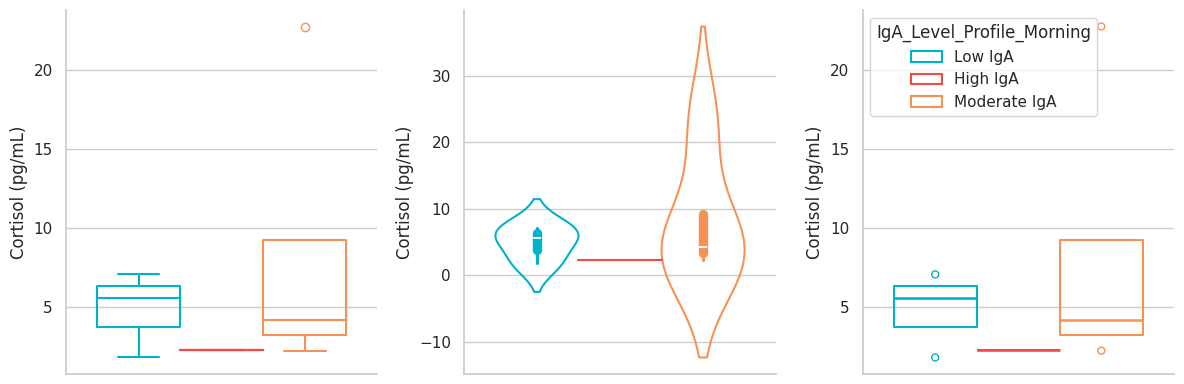

In [74]:
sns.set(style="whitegrid", font_scale=1)

palette = {"Low IgA": "#00B2CA", "Moderate IgA": "#F79256", "High IgA": "#f24a4a"}

f, axes = plt.subplots(1, 3, figsize=(12, 4), sharex=True)

sns.boxplot(
    data=df_merge, 
    y="Cortisol (pg/mL)", 
    hue="IgA_Level_Profile_Morning", 
    ax=axes[0], 
    fill=False,
    palette=palette, 
    legend=False)

sns.violinplot(
    data=df_merge, 
    y="Cortisol (pg/mL)", 
    hue="IgA_Level_Profile_Morning", 
    ax=axes[1], 
    fill=False, 
    palette=palette,
    legend=False)

sns.boxenplot(
    data=df_merge, 
    y="Cortisol (pg/mL)", 
    hue="IgA_Level_Profile_Morning", 
    ax=axes[2], 
    palette=palette,
    fill=False)

sns.despine()
plt.tight_layout()

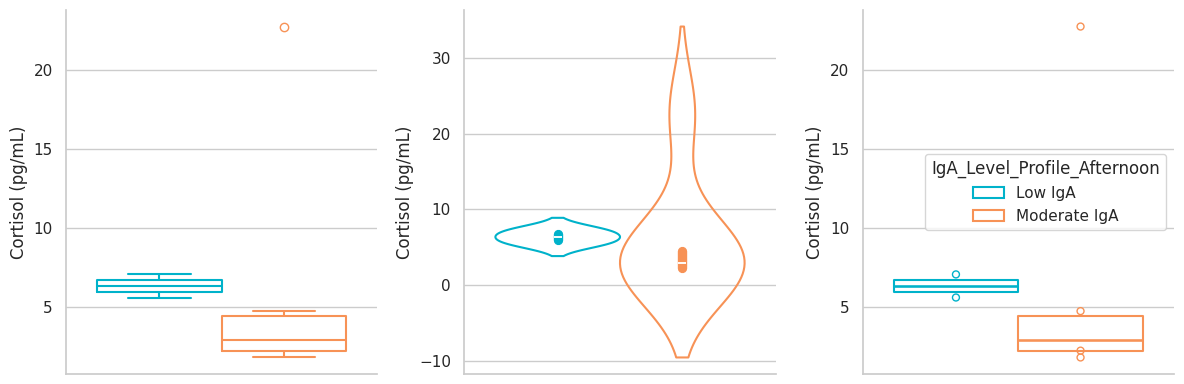

In [75]:
sns.set(style="whitegrid", font_scale=1)

palette = {"Low IgA": "#00B2CA", "Moderate IgA": "#F79256", "High IgA": "#f24a4a"}

f, axes = plt.subplots(1, 3, figsize=(12, 4), sharex=True)

sns.boxplot(
    data=df_merge, 
    y="Cortisol (pg/mL)", 
    hue="IgA_Level_Profile_Afternoon", 
    ax=axes[0], 
    fill=False,
    palette=palette, 
    legend=False)

sns.violinplot(
    data=df_merge, 
    y="Cortisol (pg/mL)", 
    hue="IgA_Level_Profile_Afternoon", 
    ax=axes[1], 
    fill=False, 
    palette=palette,
    legend=False)

sns.boxenplot(
    data=df_merge, 
    y="Cortisol (pg/mL)", 
    hue="IgA_Level_Profile_Afternoon", 
    ax=axes[2], 
    palette=palette,
    fill=False)

sns.despine()
plt.tight_layout()

In [76]:
df_merge["Cortisol_Level"] = df_merge["Cortisol (pg/mL)"].apply(classify_cortisol_level)
df_merge["Cortisol_Level"].value_counts()

Cortisol_Level
Low     7
High    1
Name: count, dtype: int64

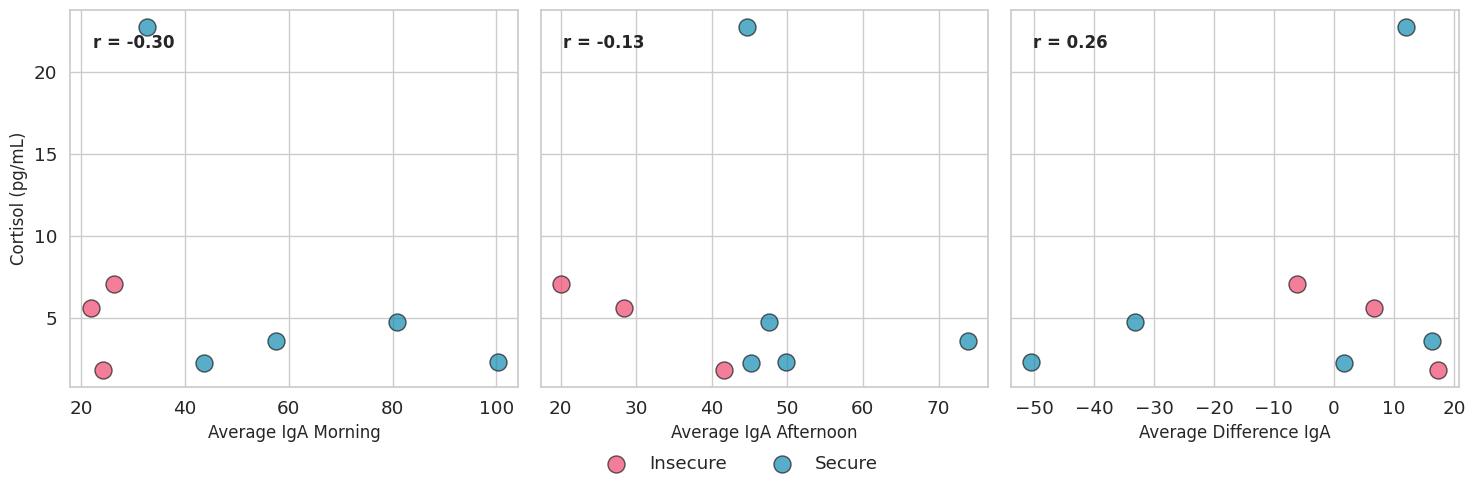

In [77]:
sns.set(style="whitegrid", font_scale=1.2)
palette = {"Secure": "#118AB2", "Insecure": "#EF476F"}

# Variables
x_vars = ["Average IgA Morning", "Average IgA Afternoon", "Average Difference IgA"]
y_var = "Cortisol (pg/mL)"

# Crear figura
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Iterar por columnas
for i, x in enumerate(x_vars):
    ax = axes[i]

    # Graficar puntos por clase
    for attachment, group in df_merge.groupby("Attachment"):
        ax.scatter(
            group[x], group[y_var],
            label=attachment if i == 0 else "",  # solo agregar leyenda 1 vez
            alpha=0.7,
            s=150,
            edgecolor='k',
            color=palette[attachment]
        )
    
    # Etiquetas de ejes
    ax.set_xlabel(x, fontsize=12)
    if i == 0:
        ax.set_ylabel(y_var, fontsize=12)
    else:
        ax.set_ylabel("")

    # Correlación dentro del gráfico
    r, _ = pearsonr(df_merge[x], df_merge[y_var])
    ax.text(
        0.05, 0.9, f"r = {r:.2f}",
        transform=ax.transAxes,
        fontsize=12,
        fontweight='bold'
    )

# Leyenda combinada abajo
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="", loc='lower center', ncol=2, frameon=False)

# Ajuste de layout
plt.tight_layout(rect=[0, 0.05, 1, 1])

### **Discussion on the Relationship Between Cortisol and IgA in the Context of Attachment**

The relationship between cortisol levels and salivary immunoglobulin A (IgA) across individuals with different attachment styles provides a valuable perspective on how psychological security may influence physiological regulation. The figures under examination illustrate how cortisol, a marker of hypothalamic–pituitary–adrenal (HPA) axis activity, aligns with immune reactivity and stability in the context of secure versus insecure attachment.

In the first figure, cortisol levels are displayed across Secure and Insecure groups through boxplots, violin plots, and combined visualizations. Insecure participants show a tendency toward higher median cortisol concentrations, while Secure individuals present greater overall variance, including a prominent outlier. Although this outlier elevates the spread in the Secure group, the median values remain lower, reinforcing the interpretation that attachment security may buffer basal cortisol levels. These patterns align with extensive psychoneuroendocrine research indicating that secure attachment is associated with dampened HPA-axis responses, whereas insecure attachment is linked to heightened stress reactivity.

The second figure examines the association between cortisol and three IgA-derived variables: average morning IgA, average afternoon IgA, and the average difference between these two values. The relationship between cortisol and morning IgA reveals a modest negative correlation (r = -0.30), suggesting that higher IgA levels in the morning may coincide with lower cortisol concentrations. This pattern may indicate a protective coupling between immune readiness and endocrine calmness during the early part of the day. The association weakens in the afternoon (r = -0.13), implying that morning immune markers may be more sensitive to cortisol regulation. Interestingly, the relationship between cortisol and IgA difference across the day reverses direction (r = 0.26), suggesting that individuals with greater IgA variability also tend to exhibit higher cortisol levels. This finding may reflect a broader pattern of physiological reactivity in which the body's immune and endocrine systems fluctuate more dramatically in individuals who lack secure emotional regulation, often typified by insecure attachment.

Overlaying attachment style onto these scatterplots reveals further distinctions. Secure individuals predominantly occupy regions characterized by lower cortisol and more stable IgA values, while insecure participants are more likely to exhibit elevated cortisol and greater variation in IgA. These distributions are consistent with prior interpretations of attachment theory, in which secure individuals are expected to exhibit physiological regulation marked by resilience and stability, whereas insecure individuals may display patterns associated with stress dysregulation and heightened physiological reactivity. This multisystem pattern suggests that attachment exerts influence not only on cognitive-emotional processes but also on biological homeostasis, potentially mediated through the HPA axis, autonomic signaling, and inflammatory responses.

The inclusion of cortisol data deepens previous findings from the IgA-based analyses. Prior explorations had demonstrated that insecure individuals—particularly males—exhibit more fluctuating IgA patterns and cluster less coherently in dimensionality-reduced space, whereas securely attached individuals form compact, consistent physiological profiles. These previous results, alongside classification model performance and SHAP-based interpretability, supported the notion that IgA-based immune features carry predictive value for attachment classification. The observed associations between cortisol and IgA now reinforce that such immune features do not operate in isolation but are coupled with neuroendocrine signals that similarly reflect the regulatory impact of attachment style.

Despite the insights provided, some limitations must be acknowledged. The sample size remains small, and the presence of extreme values such as cortisol outliers can skew interpretations. The correlations reported, though informative, are modest and must be interpreted with caution, particularly given the cross-sectional design. Furthermore, the nature of cortisol sampling—restricted to a single time point—limits the interpretive depth that could be gained from circadian rhythm analyses, cortisol awakening responses, or stress reactivity assessments. Future research should consider longitudinal or experimental designs to better characterize how cortisol and IgA co-fluctuate in real time and whether their coupling dynamics differ as a function of stress exposure or attachment-related behaviors.

In conclusion, the present findings suggest that cortisol and IgA are modestly correlated in a pattern that is modulated by attachment style. Secure attachment appears to support regulatory balance across both the immune and endocrine systems, while insecure attachment is associated with heightened reactivity and instability. These observations point to a broader framework in which attachment security promotes multi-systemic coherence, reinforcing the value of integrating psychological constructs into biological research and the promise of attachment-informed approaches to understanding psychophysiological health.


In [78]:
df_merge.to_csv("../processed_data/4_processed_cortisol_iga_data.csv", index=False)